In [ ]:
#26<=Rollnumber<=50:  Roll No: 40

In [6]:

#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [10]:
#Load dataset
iris = datasets.load_iris()
iris_dataset = pd.DataFrame(iris.data)

# print the names of the 13 features
print("Features:", iris.feature_names, sep="\n")


# print the label type of wine(class_0, class_1, class_2)
print("\nLabels:", iris.target_names)

# print data(feature)shape
iris_dataset.shape

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: ['setosa' 'versicolor' 'virginica']


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

(150, 4)

In [11]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 2)


In [12]:
#Create a Decision Tree Classifier (using Gini)
DT = DecisionTreeClassifier(criterion = "gini")

#Train the model using the training sets
final_model = DT.fit(train_x, train_y)


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [13]:
# Predict the classes of test data
prediction = DT.predict(test_x)
print("prediction:",prediction)
print(prediction.dtype)
from sklearn import metrics


prediction: [0 0 2 0 0 1 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1 1 2 1 1 2 1 0]
int64


In [14]:

# Model Accuracy, how often is the classifier correct?
Accuracy = metrics.accuracy_score(test_y, prediction)
print("Accuracy:",Accuracy)


Accuracy: 0.9555555555555556


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(DT,out_file='iris_tree.dot',feature_names=list(iris.feature_names),
               class_names=list(iris.target_names), filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'], shell = True)

127

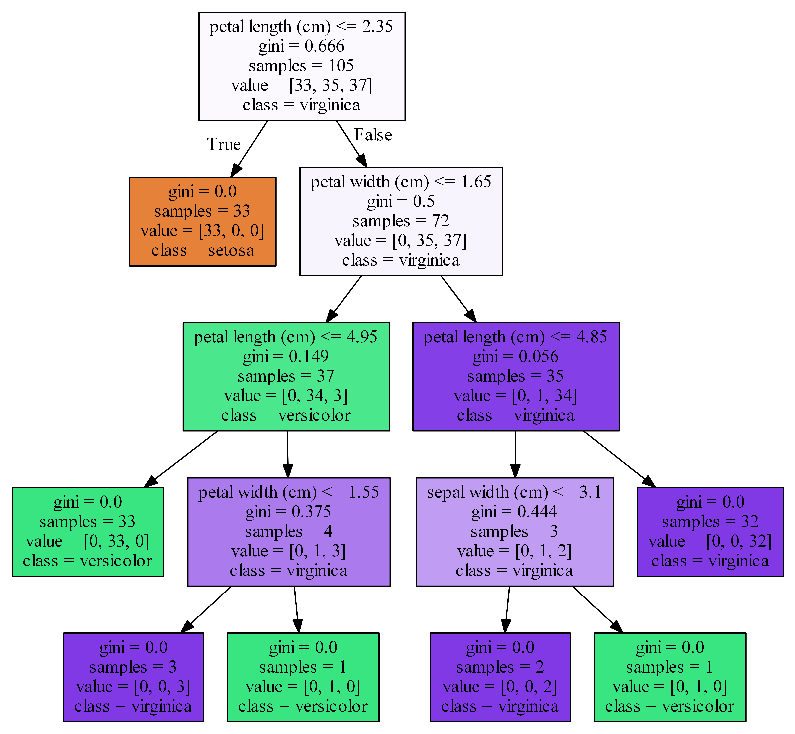

In [16]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()

In [29]:
#Task 1: Try the algo on Same Whether dataset - 
# LabelEncoding of features: and Train test Division 80%-20% with Gini Index as attribute selection measure

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [18]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [19]:
dataset_list = list(zip(Outlook, Temperature, Humidity, Wind, Play))
dataset = pd.DataFrame(dataset_list, columns = ["Outlook", "Temperature", "Humidity", "Wind", "Play"])
print("Number of examples and feature:", dataset.shape)
dataset.head()

Number of examples and feature: (14, 5)


,Outlook,Temperature,Humidity,Wind,Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [21]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Unique Outlook values: " + end, dataset['Outlook'].unique())

print(start + "\nUnique Temperature values: " + end, dataset['Temperature'].unique())

print(start + "\nUnique Humidity values: " + end, dataset['Humidity'].unique())

print(start + "\nUnique Wind values: " + end, dataset['Wind'].unique())

print(start + "\nUnique Play values " + "\033[91m (Class Label): " + end, dataset['Play'].unique())

Unique Outlook values:  ['Rainy' 'Overcast' 'Sunny']

Unique Temperature values:  ['Hot' 'Mild' 'Cool']

Unique Humidity values:  ['High' 'Normal']

Unique Wind values:  ['False' 'True']

Unique Play values  (Class Label):  ['No' 'Yes']


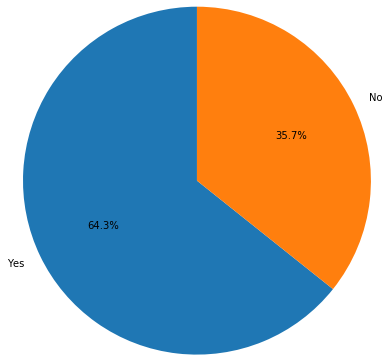

In [22]:

pie_chart = dataset['Play'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2, startangle = 90)
pie_chart.set_ylabel('')
plt.show()

In [23]:
dummy = pd.get_dummies(dataset.iloc[:,:-1])

cols = dataset.columns.tolist()
cols.remove("Play")

dataset = dataset.drop(cols, axis = 1)
dataset = pd.concat([dummy,dataset], axis = 1)

In [24]:
print("\nLabel\n\n")
labels = dataset['Play']
labels


Label




0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [25]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(dataset.iloc[:,:-1],
                        labels, test_size = 0.2, random_state = 40)
# set Random state of model equals to your roll number

In [26]:
DT = DecisionTreeClassifier(max_leaf_nodes = 40, random_state = 40) # roll no 40
# as max_leaf_nodes is less i.e 2 ...model might underfit

# fitting the model or training
final_model = DT.fit(data_train,target_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [27]:

# testing
target_predict = DT.predict(data_test)

In [30]:
# Accuracy
Accuracy = accuracy_score(target_test, target_predict)
print("Accuracy:", Accuracy)

Accuracy: 1.0


In [31]:
# Confusion Matrix
cm = confusion_matrix(target_test, target_predict)
print("Confusion Matrix:\n")
cm

Confusion Matrix:



array([[2, 0],
       [0, 1]])

In [32]:
# Precision
precision = precision_score(target_test, target_predict, average=None)
print("Precision:\n")
precision

Precision:



array([1., 1.])

In [33]:
# Recall
recall = recall_score(target_test, target_predict, average=None)
print("Recall:\n")
recall

Recall:



array([1., 1.])

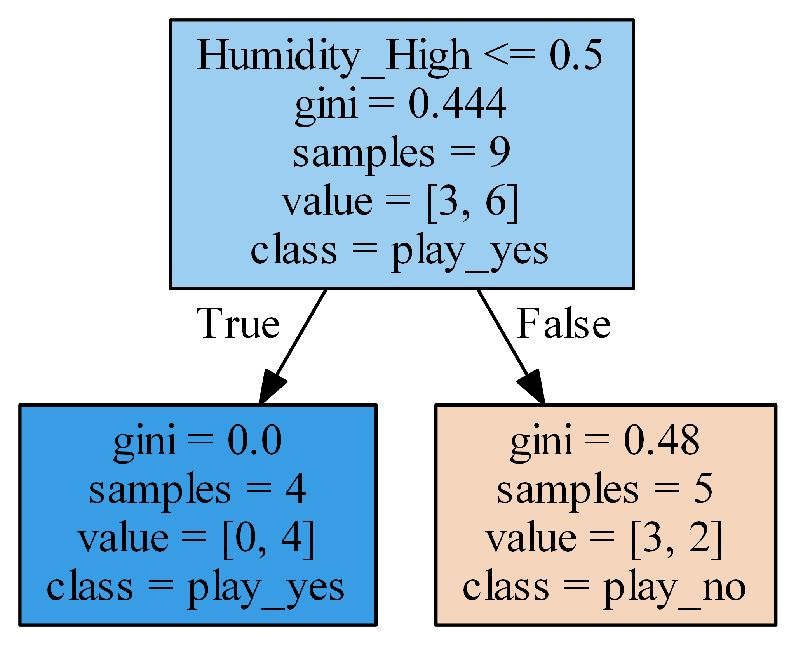

In [34]:
from sklearn.tree import export_graphviz

features = dataset.columns.tolist()
features.remove("Play")

export_graphviz(DT,out_file='onehot_tree_entropy.dot',
               feature_names=features,
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'onehot_tree_entropy.dot', '-o', 'onehot_tree_entropy.png', '-Gdpi=600'], shell=True)

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('onehot_tree_entropy.png'))
plt.axis('off')
plt.show()

In [ ]:
(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?



In [35]:
'''
Rainy = 0,1,0
Mild = 0,0,1
Normal = 0,1
False = 1,0
'''
q1 = [0,1,0,0,0,1,0,1,1,0]

In [ ]:
(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

In [36]:
'''
Sunny = 0,0,1
Cool = 1,0,0
High = 1,0
True = 0,1
'''
q2 = [0,0,1,1,0,0,1,0,0,1]

features = dataset.columns.tolist()
features.remove("Play")
df = pd.DataFrame([q1,q2], columns = features)
df.head()

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_False,Wind_True
0,0,1,0,0,0,1,0,1,1,0
1,0,0,1,1,0,0,1,0,0,1


In [37]:
ans = DT.predict(df)
print("Play predicted:\nq1: {}\nq2: {}".format(ans[0],ans[1]))

Play predicted:
q1: Yes
q2: No


In [ ]:
#Task 2: Apply algorithm on digits dataset - One Hot Encoding of features: and Train test Division 65%-35%


In [38]:
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets

In [44]:

#Load dataset
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:549: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = data[:, -1].astype(np.int, copy=False)


In [45]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [46]:
#import the necessary module
from sklearn.model_selection import train_test_split

X=digits.data
Y=digits.target
#split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.35, random_state = 40)

In [47]:
#Create a Decision Tree Classifier (using Gini)
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 40,max_depth=7, min_samples_leaf=40)

clf_gini.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [48]:
# Predict the classes of test data
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[8 1 9 0 3 2 4 7 9 2 0 4 0 6 4 6 7 3 5 0 3 8 5 2 0 4 0 1 7 5 9 1 4 2 6 4 7
 9 7 5 5 9 8 4 2 4 8 9 0 0 4 9 2 9 1 2 4 4 5 1 8 2 7 0 4 6 9 9 4 4 7 1 7 4
 7 6 2 9 5 4 2 2 9 4 3 4 3 7 2 1 2 9 0 0 7 1 9 6 7 0 8 2 5 1 2 5 2 9 3 2 4
 4 4 1 9 6 6 8 6 4 3 8 8 3 7 6 2 1 1 2 9 2 4 9 3 9 7 7 6 9 2 6 2 4 2 8 0 2
 4 4 3 2 7 9 7 6 4 2 7 7 2 6 6 9 1 2 8 4 7 4 3 8 9 4 4 2 6 1 4 0 4 2 8 9 2
 0 0 4 3 0 7 9 0 2 0 3 0 2 6 9 4 1 4 0 4 8 3 4 2 1 3 3 8 8 4 7 6 5 5 9 2 3
 3 6 2 3 9 2 6 6 9 4 1 8 7 8 6 3 2 5 4 3 3 0 2 0 1 1 9 6 6 7 9 4 2 4 0 8 2
 9 4 7 7 8 7 2 7 6 9 4 2 7 7 2 5 7 2 1 5 7 3 9 4 3 9 4 7 0 4 7 7 7 7 6 8 6
 9 2 2 0 9 7 3 1 0 9 2 7 6 4 4 1 3 0 2 1 2 9 4 9 9 4 6 0 0 4 7 7 5 9 7 4 2
 2 5 8 4 4 0 3 3 7 3 9 9 2 4 5 4 1 7 0 9 7 5 2 9 5 2 9 9 6 1 3 0 4 7 7 4 4
 3 3 4 7 2 8 0 0 8 5 4 4 8 1 6 9 4 2 7 3 6 5 4 3 6 6 5 7 4 6 3 9 5 8 4 4 2
 6 5 9 3 0 9 5 9 4 8 7 6 0 6 3 2 4 8 1 2 0 5 7 4 3 9 2 1 9 3 2 1 3 5 3 6 7
 6 0 4 2 0 4 7 1 2 2 5 7 6 5 2 1 8 8 8 1 3 5 9 2 2 8 1 2 9 9 6 8 1 8 4 4 6
 7 4 0 

In [49]:
# Model Accuracy
from sklearn import metrics
print("Confusion Matrix: ",
        metrics.confusion_matrix(y_test, y_pred))
print ("Accuracy : ",
    metrics.accuracy_score(y_test,y_pred)*100)
print("Report : ",
    metrics.classification_report(y_test, y_pred))


Confusion Matrix:  [[56  0  0  0  1  0  0  0  0  1]
 [ 0 34 13  3 15  0  0  3  0  7]
 [ 0  4 39  5  7  0  2  0  0  0]
 [ 0  1  6 39  1  1  0  6  2  5]
 [ 4  0  4  0 51  0  0  3  0  0]
 [ 1  0  2  0  1 41  0  0  0  9]
 [ 0  0  1  0  9  0 53  0  1  2]
 [ 0  0  3  0  9  0  0 50  1  0]
 [ 0  7 12  3  2  1  0  5 35  4]
 [ 0  0  2  4  2  0  0  8  3 45]]
Accuracy :  70.42925278219397
Report :                precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.74      0.45      0.56        75
           2       0.48      0.68      0.56        57
           3       0.72      0.64      0.68        61
           4       0.52      0.82      0.64        62
           5       0.95      0.76      0.85        54
           6       0.96      0.80      0.88        66
           7       0.67      0.79      0.72        63
           8       0.83      0.51      0.63        69
           9       0.62      0.70      0.66        64

    accuracy  